In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

2025-08-03 11:14:08.591075: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 11:14:08.596678: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 11:14:08.610528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754199848.633756   43406 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754199848.640294   43406 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754199848.657296   43406 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing images:", x_test.shape)
print("Shape of testing labels:", y_test.shape)

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)


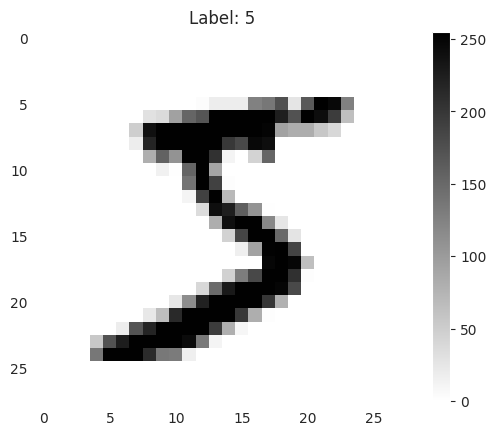

In [5]:
# Printing single image
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = Sequential([
    # flattening 28,28 for 784 pixel to feed to the layer.
    Flatten(input_shape=(28, 28)),

    # first dense layer 128
    Dense(128, activation='relu'),

    # softmax to classify the result from 0-9
    Dense(10, activation='softmax')
])

/home/rajendrayadav/PycharmProjects/llm-project/.venv/lib64/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-03 11:14:11.765284: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
print("\n--- Training the model ---")
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
print("--- Model training finished ---")


--- Training the model ---
Epoch 1/10


2025-08-03 11:14:12.373193: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9280 - loss: 0.2536 - val_accuracy: 0.9607 - val_loss: 0.1331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9682 - loss: 0.1102 - val_accuracy: 0.9661 - val_loss: 0.1050
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0767 - val_accuracy: 0.9772 - val_loss: 0.0784
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9828 - loss: 0.0570 - val_accuracy: 0.9764 - val_loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9752 - val_loss: 0.0820
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9774 - val_loss: 0.0745
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9762 - val_loss: 0.0797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accura

In [11]:
print("\n--- Evaluating the model ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


--- Evaluating the model ---
313/313 - 1s - 3ms/step - accuracy: 0.9812 - loss: 0.0697

Test accuracy: 0.9812
Test loss: 0.0697


In [12]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
print("\n--- Making a prediction ---")
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

print("Prediction for the first test image:", predicted_label)
print("True label for the first test image:", true_label)


--- Making a prediction ---
Prediction for the first test image: 7
True label for the first test image: 7


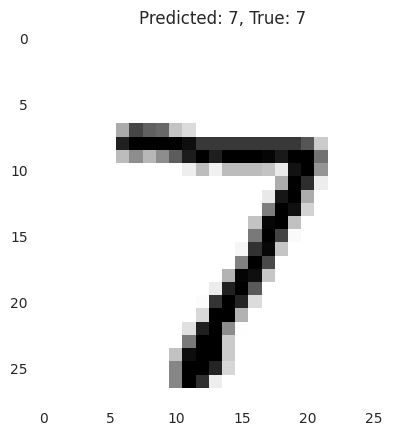

In [14]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.grid(False)
plt.show()

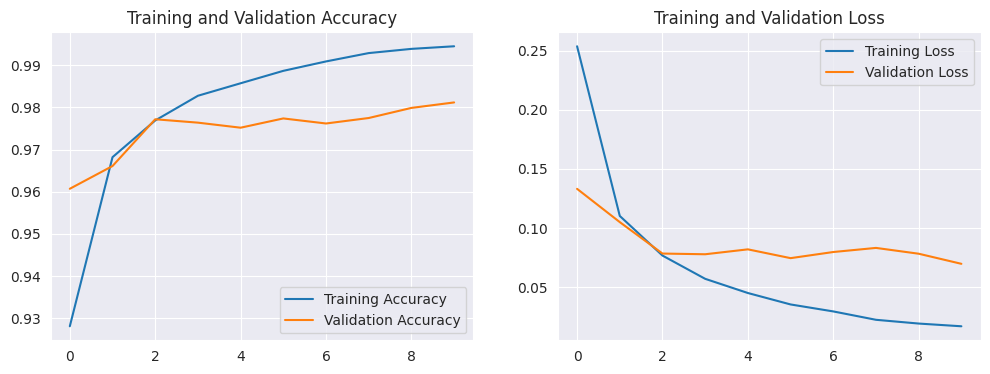

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix


--- Generating Confusion Matrix ---


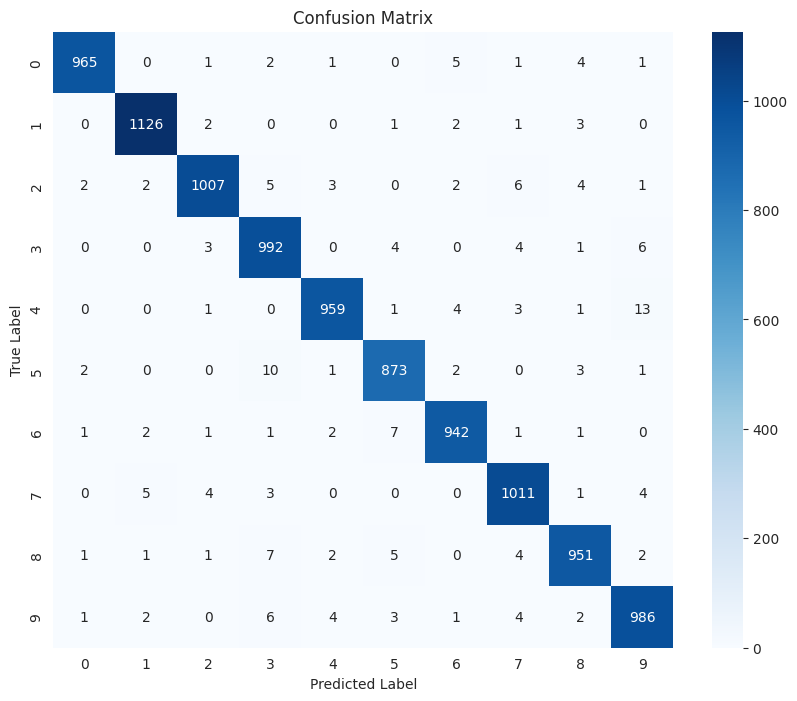

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\n--- Generating Confusion Matrix ---")
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Saving model to `models/mnist_model.keras`

In [17]:
model.save('models/mnist_model.keras')
print("Model saved to mnist_model.keras")

Model saved to mnist_model.keras


## Loading saved model

In [18]:
loaded_model = tf.keras.models.load_model('models/mnist_model.keras')

In [19]:
predictions = loaded_model.predict(x_test)
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

print("Prediction for the first test image:", predicted_label)
print("True label for the first test image:", true_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction for the first test image: 7
True label for the first test image: 7


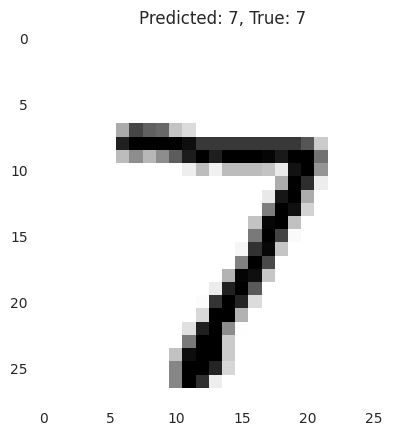

In [20]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.grid(False)
plt.show()